In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
raw_data = pd.read_csv('Data/1.03. Dummies.csv')

In [3]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


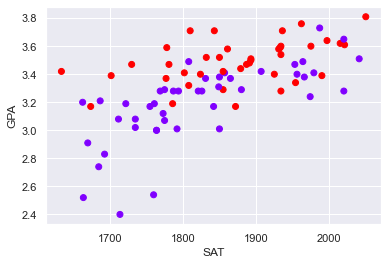

In [6]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'], cmap='rainbow')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [7]:
x1 = data[['SAT','Attendance']]
y = data['GPA']

In [8]:
x =sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\AGO DUAPA FURNITURES\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           2.19e-15
Time:                        10:43:40   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

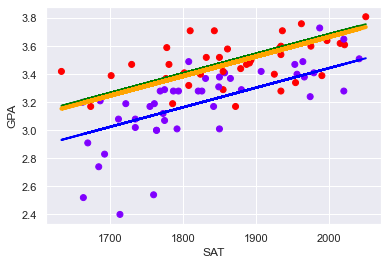

In [9]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'], cmap='rainbow')
yhat = 0.8665 + 0.0014*data['SAT']
yhat_yes = 0.6439 + 0.0014*data['SAT']
yhat_no = 0.8865 + 0.0014*data['SAT']
fig=plt.plot(data['SAT'],yhat_yes,lw=2 ,c='blue', label='Regression Line 1')
fig=plt.plot(data['SAT'],yhat_no,lw=2, c='green',label='Regression Line 2')
fig=plt.plot(x1['SAT'],yhat, lw=4, c='orange',label='Regression Line ')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [10]:
table = x1.copy()
table = sm.add_constant(table)

C:\Users\AGO DUAPA FURNITURES\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
predictions = results.predict(table)

In [12]:
table['Predictions (GPA)'] = predictions

In [13]:
table

,const,SAT,Attendance,Predictions (GPA)
0,1.0,1714,0,3.043110
1,1.0,1664,0,2.973120
2,1.0,1760,0,3.107501
3,1.0,1685,0,3.002516
4,1.0,1693,0,3.013715
...,...,...,...,...
79,1.0,1936,1,3.576510
80,1.0,1810,1,3.400135
81,1.0,1987,0,3.425256
82,1.0,1962,1,3.612905


In [14]:
table['Actual'] = y

In [15]:
table

,const,SAT,Attendance,Predictions (GPA),Actual
0,1.0,1714,0,3.043110,2.40
1,1.0,1664,0,2.973120,2.52
2,1.0,1760,0,3.107501,2.54
3,1.0,1685,0,3.002516,2.74
4,1.0,1693,0,3.013715,2.83
...,...,...,...,...,...
79,1.0,1936,1,3.576510,3.71
80,1.0,1810,1,3.400135,3.71
81,1.0,1987,0,3.425256,3.73
82,1.0,1962,1,3.612905,3.76
